In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import time

In [2]:
from api_key import api_key
print(type(api_key))

<class 'str'>


In [5]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

ModuleNotFoundError: No module named 'citipy'

In [4]:
#tell me about citipy
citipy.cities.line_num



NameError: name 'citipy' is not defined

In [43]:
# Output File (CSV)
output_data_path = "./cities.csv"

In [6]:
lat= 34.64
lon= -120.46

In [7]:
weather_response =requests.get (f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}")

In [8]:
#find out what is the type for weather
#type(weather_response)

In [9]:
weather_response.json()

{'coord': {'lon': -120.46, 'lat': 34.64},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 280.44,
  'pressure': 1021,
  'humidity': 93,
  'temp_min': 277.04,
  'temp_max': 282.15},
 'visibility': 16093,
 'wind': {'speed': 2.58, 'deg': 5.00565},
 'clouds': {'all': 75},
 'dt': 1553436328,
 'sys': {'type': 1,
  'id': 5773,
  'message': 0.0053,
  'country': 'US',
  'sunrise': 1553436003,
  'sunset': 1553480165},
 'id': 5367788,
 'name': 'Lompoc',
 'cod': 200}

In [10]:
# Range of latitudes and longitudes from city.py library
lat_range = (-90, 90)
lng_range = (-180, 180)  
  

In [11]:
  # List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [12]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# for lat_lng in lat_lngs:
#     print(lat_lng)


In [13]:
# Identify nearest city for each lat, lng combination
city_lat_lng =dict()
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        
        
        cities.append(city)
       # city_lat_lng[city] = [lat_lng[0], lat_lng[1]]#this is an list that stores cityname and latlon

# Print the city count to confirm sufficient count
len(cities)


617

In [14]:
weather_response_city = (weather_response.json()['name'])

In [15]:
weather_response_city

'Lompoc'

In [16]:
weather_response_humidity = (weather_response.json()['main']["humidity"])
print(weather_response_humidity)
city

93


'marawi'

In [17]:
print(cities[:10])

['vanimo', 'roebourne', 'rikitea', 'aklavik', 'belushya guba', 'acapulco', 'punta arenas', 'pangnirtung', 'atuona', 'beaumont']


In [18]:
#test weather data for a city in unique cities list -- if found return the humidity, name, 
if weather_response_humidity in cities[:10]:
    city_lat_lng[weather_response_city]
print(city_lat_lng)


{}


In [19]:
#print(cities)

In [20]:
#cities[0].head()
len(cities)

617

In [39]:
weather_df = pd.DataFrame(columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max_Temp","Wind_Speed"])


In [40]:
counter = 0
weather_df = pd.DataFrame(columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max_Temp","Wind_Speed"])

for cityname in cities:

    
    counter = counter +1 
    print(f"Processing Record {counter} of {len(cities)} | {cityname}")
    
    try:
       # weather_data.append(ow.get_current(city, **settings))
       
        #var=requests.get("https://api.openweathermap.org/data/2.5/weather",params={"lat":lat,"lon":lon,"appid":api_key}).json()
        var=requests.get(f"https://api.openweathermap.org/data/2.5/weather?q={cityname}&appid={api_key}").json()


        cityn = var["name"]
        #print(cityn)
     
        clouds = var["clouds"]["all"]
       # print(clouds)
        
        country =var["sys"]["country"]
        #print(country)
       
        date = var["dt"]
        
        #date =(((date/60)/60)/24)+DATE(1970,1,1)
      
        humidity = var["main"]["humidity"]
        #print(humidity)
         
        lat = var["coord"]["lat"]
        #print(lat)

        long = var["coord"]["lon"]
        #print(lon)
   
        maxtemp = var["main"]["temp_max"]
        #print(maxtemp)
        maxtemp2 = ((maxtemp -273) * (9/5))+32
        #print(maxtemp)
        windspeed = var["wind"]["speed"]
        windspeed = (windspeed / 0.44704)
        #print(type(windspeed))
#this is the process that takes the variables from the jason and associates them to the dataframe                                      
        Values_dict = {"City":cityn,"Cloudiness":clouds,"Country":country,"Date":date,"Humidity":humidity,"Lat":lat,"Lng":long,"Max_Temp":maxtemp2,"Wind_Speed":windspeed}   
        weather_df = weather_df.append(Values_dict, ignore_index = True)
       
                                           
    except:
        print(f"City not found. Skipping... {cityname}")
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")
        
#        break

Processing Record 1 of 617 | vanimo
Processing Record 2 of 617 | roebourne
Processing Record 3 of 617 | rikitea
Processing Record 4 of 617 | aklavik
Processing Record 5 of 617 | belushya guba
City not found. Skipping... belushya guba
Processing Record 6 of 617 | acapulco
Processing Record 7 of 617 | punta arenas
Processing Record 8 of 617 | pangnirtung
Processing Record 9 of 617 | atuona
Processing Record 10 of 617 | beaumont
Processing Record 11 of 617 | yellowknife
Processing Record 12 of 617 | jamestown
Processing Record 13 of 617 | ushuaia
Processing Record 14 of 617 | ruatoria
City not found. Skipping... ruatoria
Processing Record 15 of 617 | illoqqortoormiut
City not found. Skipping... illoqqortoormiut
Processing Record 16 of 617 | qaanaaq
Processing Record 17 of 617 | marystown
Processing Record 18 of 617 | hithadhoo
Processing Record 19 of 617 | emba
Processing Record 20 of 617 | hermanus
Processing Record 21 of 617 | karauzyak
City not found. Skipping... karauzyak
Processing R

In [41]:
weather_df.head(30)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Vanimo,44,PG,1553440212,99,-2.67,141.30,83.2766,17.627058
1,Roebourne,92,AU,1553440594,88,-20.77,117.15,75.7166,34.627774
2,Rikitea,88,PF,1553440594,100,-23.12,-134.97,76.3466,16.508590
3,Aklavik,40,CA,1553436000,78,68.22,-135.01,17.8700,5.816034
4,Acapulco,5,MX,1553435040,69,16.86,-99.88,75.4700,3.355404
5,Punta Arenas,40,CL,1553440389,62,-53.16,-70.91,55.2740,23.040444
6,Pangnirtung,80,CA,1553440596,92,66.15,-65.72,18.9266,10.468862
7,Atuona,64,PF,1553440502,100,-9.80,-139.03,82.3766,17.067824
8,Beaumont,1,US,1553440507,73,30.09,-94.10,72.2660,11.408375
9,Yellowknife,75,CA,1553440367,65,62.45,-114.38,9.2660,13.869005


In [89]:
weather_df.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max_Temp      554
Wind_Speed    554
dtype: int64

In [81]:
#save data frame weather attributes as a csv file
weather_df.to_csv(output_data_path)

In [84]:
print("Latitude vs. TEMPERATURE Plot")

Latitude vs. TEMPERATURE Plot


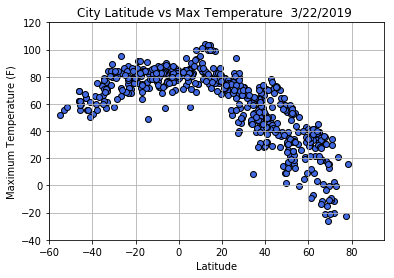

<Figure size 432x288 with 0 Axes>

In [82]:
#Plot lattitude v Maximum Temperature F
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(weather_df["Lat"], weather_df["Max_Temp"], color="RoyalBlue", edgecolor = "black")
# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature  3/22/2019 ")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.xlim(-60,95)
plt.ylim(-40,120)
plt.grid(True)

# Create the figure
plt.show()
  # Save Figure
plt.savefig("LatitudeMaxTemp-ScatterPlot.png", bbox_inches='tight')

In [83]:
print("Latitude vs. Humidity Plot")

Latitude vs. Humidity Plot


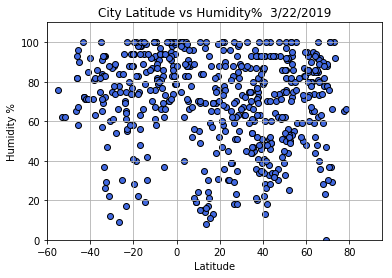

<Figure size 432x288 with 0 Axes>

In [78]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color="RoyalBlue", edgecolor = "black")
# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity%  3/22/2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.xlim(-60,95)
plt.ylim(0,110)
plt.grid(True)

# Create the figure
plt.show()
  # Save Figure
plt.savefig("LatitudeHumidity-ScatterPlot.png", bbox_inches='tight')

In [85]:
print("Latitude vs. CLOUDINESS")

Latitude vs. CLOUDINESS


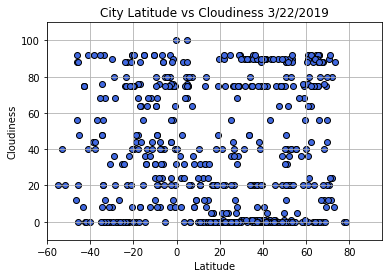

<Figure size 432x288 with 0 Axes>

In [90]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color="RoyalBlue", edgecolor = "black")
# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness 3/22/2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-60,95)
plt.ylim(-10,110)
plt.grid(True)

# Create the figure
plt.show()
  # Save Figure
plt.savefig("LatitudeCloudiness-ScatterPlot.png", bbox_inches='tight')

In [86]:
print("Latitude vs. WIND SPEED  mph   Plot")

Latitude vs. WIND SPEED  mph   Plot


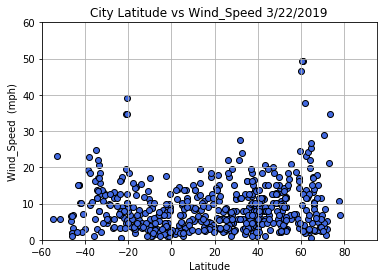

<Figure size 432x288 with 0 Axes>

In [76]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(weather_df["Lat"], weather_df["Wind_Speed"], color="RoyalBlue", edgecolor = "black")
# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind_Speed 3/22/2019")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed  (mph)")
plt.xlim(-60,95)
plt.ylim(0,60)
plt.grid(True)

# Create the figure
plt.show()
  # Save Figure
plt.savefig("LatitudeWind_Speed-ScatterPlot.png", bbox_inches='tight')